In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

import pickle
import time
from tqdm import tqdm

In [10]:
names = {"Log. Reg": "blue", "Lin. SVM":"firebrick", "SVM":"purple", "kNN": "gray", 
         "RF":"#f86000", "MLP":"green", "RerF":"cyan", "S-RerF":"red"}

paths = {"Impulse":"time_series_experiment/s-rerf_impulse_experiment_rerf_1run.csv",
         "Discretized Circle":"circle_experiment/s-rerf_circle_runs_rerf.csv",
         "Image":"hvbar/s-rerf_runs.csv"}

In [164]:
def plot_simulation(ax, name, path):
    dat = pd.read_csv(path)

    d1 = pd.DataFrame(columns = ['classifier', 'n', 'Lhat', 'se', 'color'])

    k = 0
    for ni in np.unique(dat['n']):
        for cl in np.unique(dat['classifier']):

            tmp = dat[np.logical_and(dat['classifier'] == cl,dat['n'] == ni)][['n', 'Lhat']]

            se = stats.sem(tmp['Lhat'])

            list(tmp.mean())
            d1.loc[k] = [cl] + list(tmp.mean()) + [se] + [names[cl]]
            k += 1


    #fig, ax = ax1=plt.subplot(2, 2, 1)

    for key in names.keys():
        grp = d1[d1['classifier'] == key] 
        if len(grp) == 0:
            continue
        ax = grp.plot(ax=ax, kind='line', x='n', y='Lhat', label=key, \
                c = names[key], alpha =0.65)
        #ax.set_xscale('log')

    ax.legend(loc='best',title='Algorithm', borderpad=0.1, labelspacing=0.5)
    ax.title.set_text('%s Classification' % name)
    ax.set_xlabel('')


In [165]:
sns.set(style="darkgrid", rc={'figure.dpi': 300,'font.size':11, 'legend.fontsize': 11})        

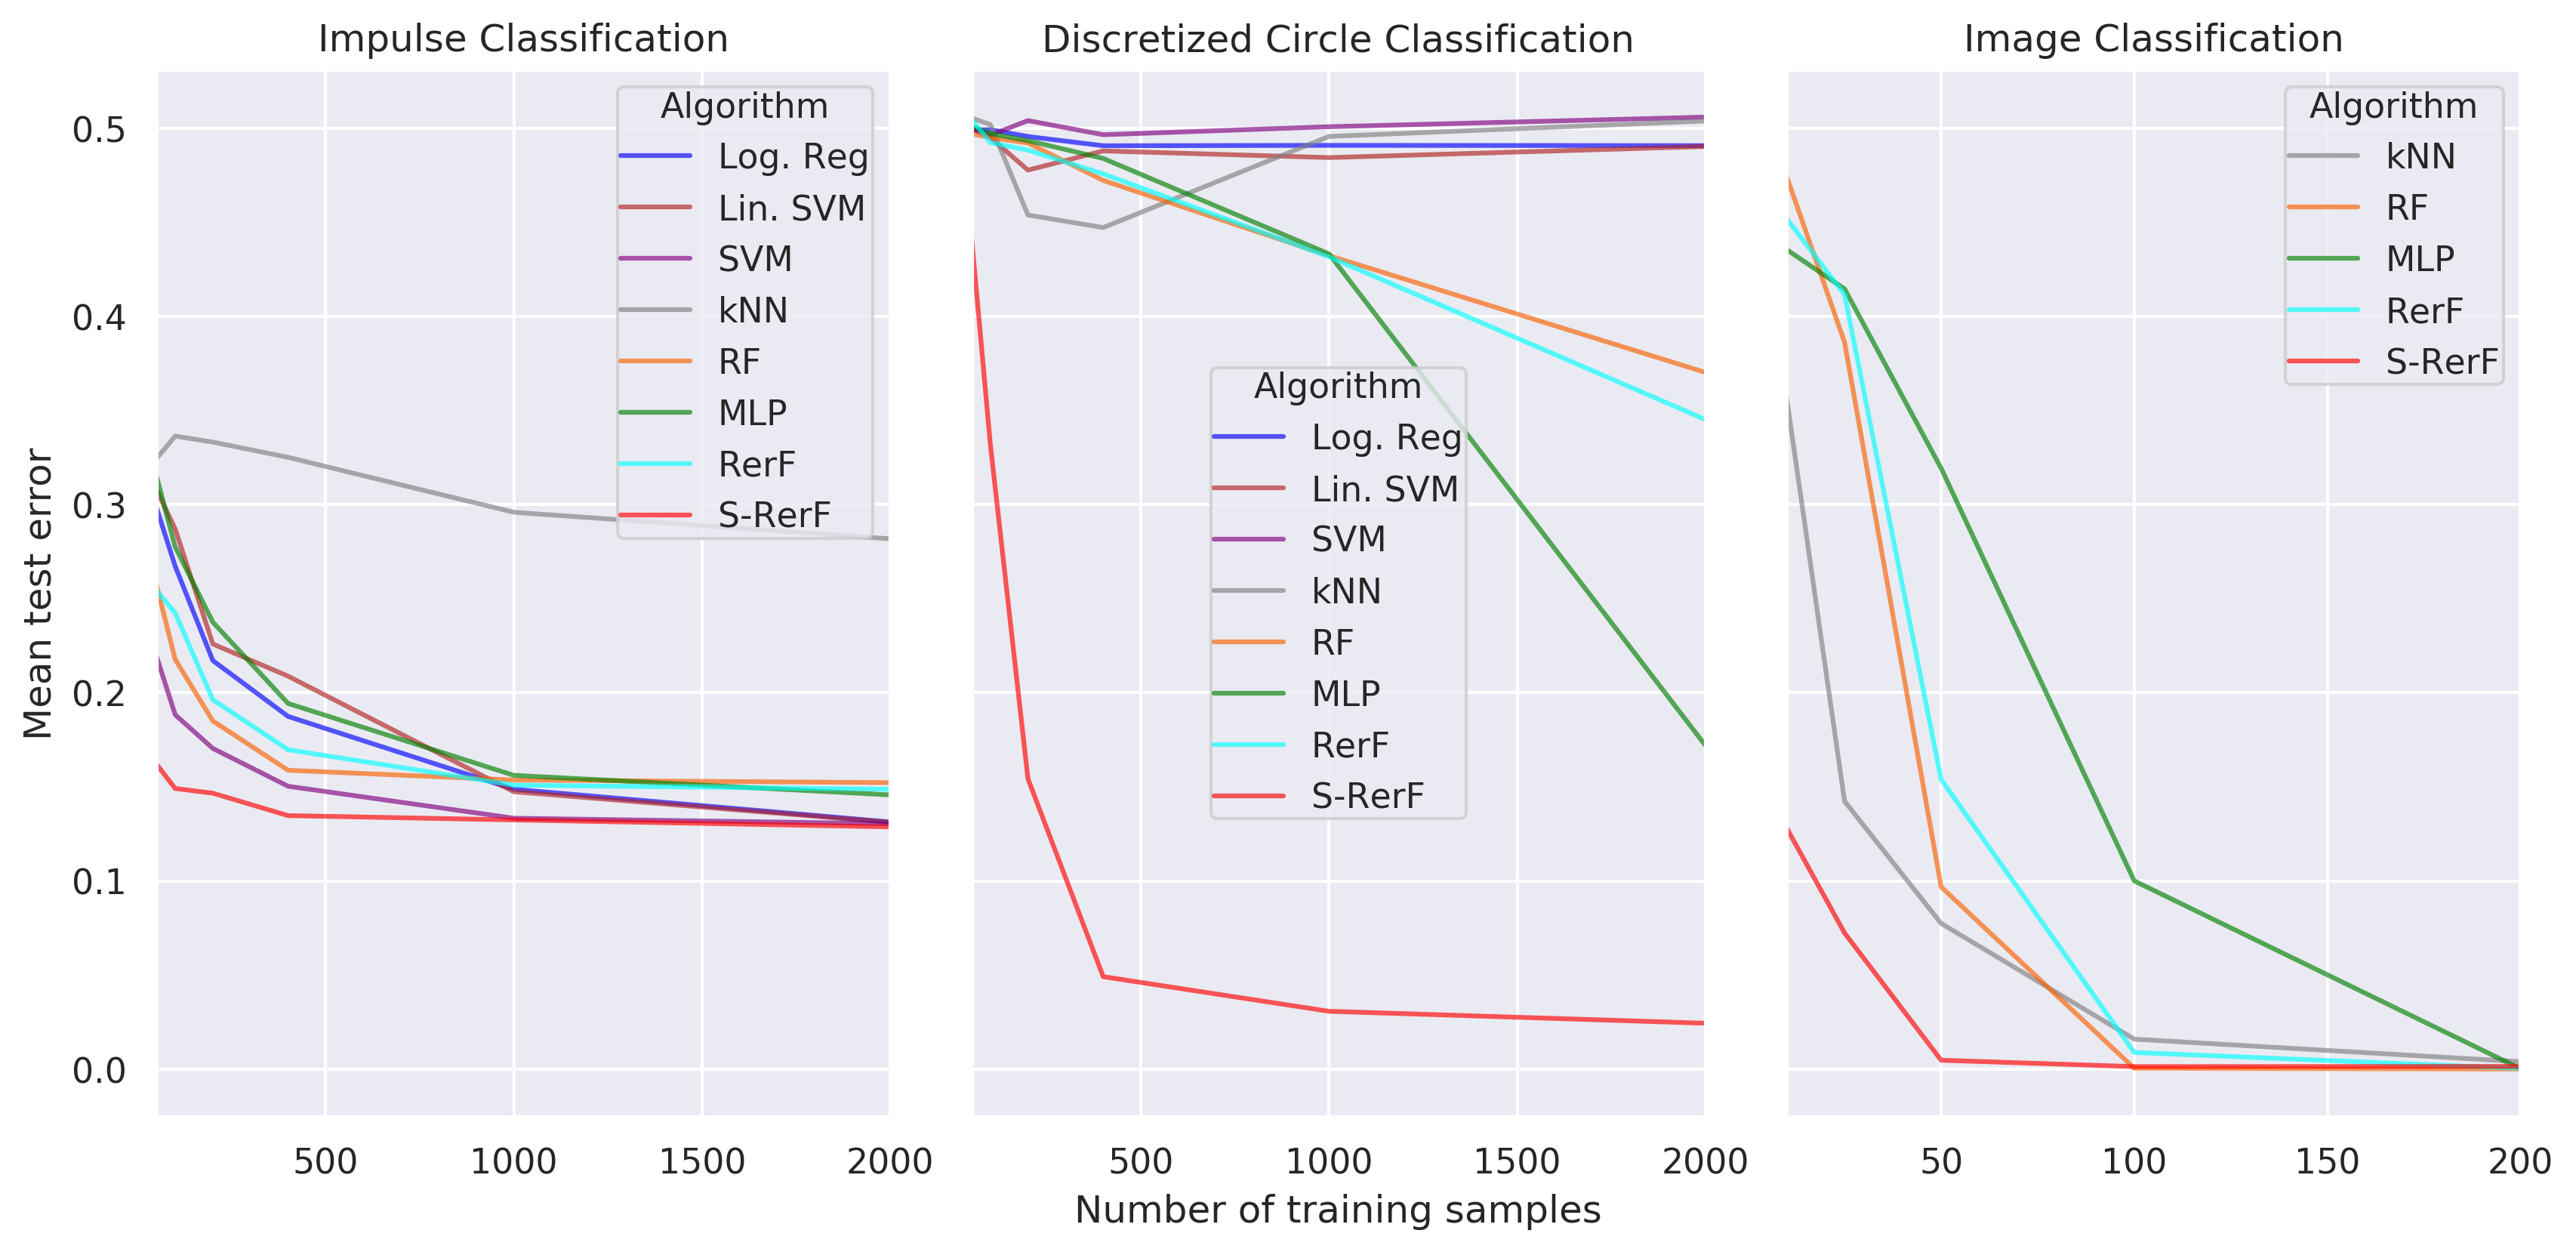

In [173]:
fig, axes = plt.subplots(1,3, figsize = (12,6), sharey=True, sharex=False)
for ax,(name,path) in zip(axes, paths.items()):
    plot_simulation(ax,name,path)
    
bax = fig.add_subplot(111, frameon=False)
bax.grid(None)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.ylabel('Mean test error')
plt.xlabel('Number of training samples')

fig.tight_layout()
#plt.savefig('./s-rerf_3plot_experiment.pdf',dpi=300,format='pdf')
plt.show()